#### Quick look at the data

In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import geopandas
from argopy import DataFetcher as ArgoDataFetcher

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [2]:
plt.rc('font', size=12)

### Argo data

Tried to load in some Argo data to have a look at but this method did not seem to work.

In [14]:
argo_loader = ArgoDataFetcher()
latmin, latmax = -60, -45
lonmin, lonmax = -180, 180
pressure_min, pressure_max = 0, 10

In [33]:
# ds_argo = argo_loader.region([lonmin, lonmax, latmin, latmax, pressure_min, pressure_max, '2019-01', '2019-02']).to_xarray()

### Saildrone data

Circumpolar track around the Southern Ocean from 2019.

In [51]:
# TO DO: Upload ADCP data file and load that in too

In [6]:
file = '~/OHW22_proj_front_finder/data/saildrones/saildrone-gen_5-antarctica_circumnavigation_2019-sd1020-20190119T040000-20190803T043000-1440_minutes-v1.1620361814756.nc'

In [7]:
ds_saildrone = xr.open_dataset(file)

In [10]:
variables = [
    'TEMP_CTD_RBR_STDDEV',
    'TEMP_CTD_RBR_MEAN',
    'SAL_RBR_MEAN',
    'SAL_RBR_STDDEV',
    'O2_CONC_AANDERAA_MEAN',
    'O2_CONC_AANDERAA_STDDEV',
    'CHLOR_RBR_MEAN',
    'CHLOR_RBR_STDDEV']

subset_saildrone = ds_saildrone[variables]

# How are these variables calculated? Mean/sstdev of the top few m??

In [11]:
subset_saildrone = subset_saildrone.isel(trajectory = 0)

In [15]:
df = subset_saildrone.to_dataframe()

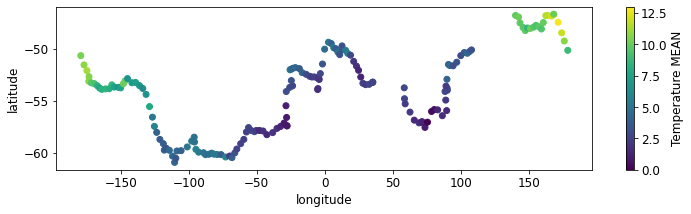

In [36]:
fig, ax = plt.subplots(figsize = (12,3))
plt.scatter(df.longitude, df.latitude, c = df.TEMP_CTD_RBR_MEAN, vmin = 0, vmax = 13)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label = 'Temperature MEAN')

# TO DO: add ADT contours and plot trajectory of saildrone on a map 

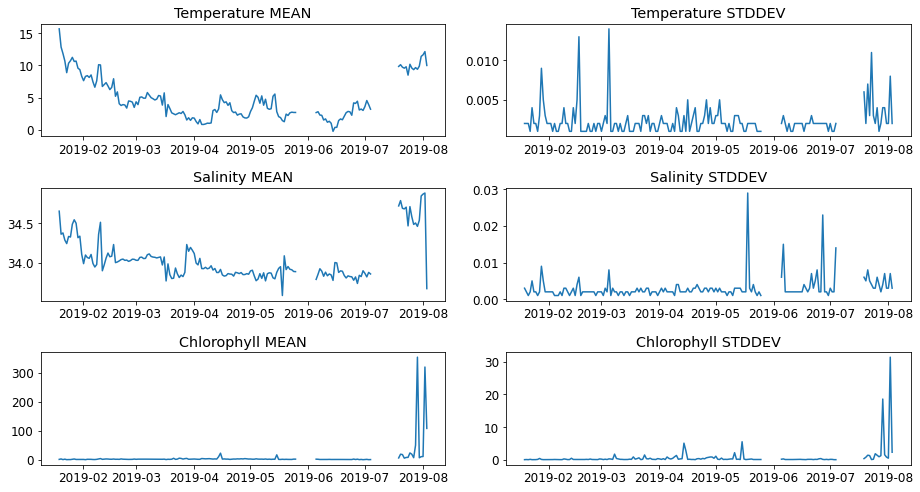

In [68]:
# Some timeseries plots to have a look at the data 

fig, axs = plt.subplots(3, 2, figsize = (13,7))
axs = axs.flatten()

axs[0].plot(df.time, df.TEMP_CTD_RBR_MEAN)
axs[0].set_title('Temperature MEAN')

axs[1].plot(df.time, df.TEMP_CTD_RBR_STDDEV)
axs[1].set_title('Temperature STDDEV')

axs[2].plot(df.time, df.SAL_RBR_MEAN)
axs[2].set_title('Salinity MEAN')

axs[3].plot(df.time, df.SAL_RBR_STDDEV)
axs[3].set_title('Salinity STDDEV')

axs[4].plot(df.time, df.CHLOR_RBR_MEAN)
axs[4].set_title('Chlorophyll MEAN')

axs[5].plot(df.time, df.CHLOR_RBR_STDDEV)
axs[5].set_title('Chlorophyll STDDEV')

plt.tight_layout(h_pad = 1.2)